In [ ]:
using Plots, Plots.Measures, Printf
default(size=(1200, 400), framestyle=:box, label=false, grid=false, margin=10mm, lw=6, labelfontsize=20, tickfontsize=20, titlefontsize=24)

@views function diffusion_1D()
    # physics
    lx   = 20.0
    dc   = 1.0
    ρ = 20.0
    # ρ = 200
    # ρ = 1
    # numerics
    nx   = 200
    nvis = 5
    # derived numerics
    dx   = lx / nx
    dt   = dx/sqrt(1/ρ) / 1.1
    nt   = 5nx
    xc   = LinRange(dx / 2, lx - dx / 2, nx)
    # array initialisation
    C    = @. 1.0 + exp(-(xc-lx/4)^2) - xc/lx
    C_i  = copy(C)
    qx   = zeros(Float64, nx - 1)
    # time loop
    @gif for it = 1:nt
        #ρ dq/dt + q/dc = .-diff(C) ./ dx
        #ρ .* dc .* (q .- q_prev) ./ dt + q_prev = .-dc .* diff(C) ./ dx
        #q .-= dt / (ρ * dc) .* -dc .* diff(C) ./ dx
        qx          .-= dt / (ρ * dc) .* (qx .+ dc .* diff(C) ./ dx)
        C[2:end-1] .-= dt .* diff(qx) ./ dx
        
        plot(xc, [C_i, C]; xlims=(0, lx), ylims=(-0.1, 2.1),
                         xlabel="lx", ylabel="Concentration",
                         title="time = $(round(it*dt,digits=1))")
        
    end every nvis
end

diffusion_1D (generic function with 1 method)

┌ Info: Saved animation to /var/folders/dh/7gcbk1ks5s71lsn7n8dxvllh0000gn/T/jl_XaZYFQnOve.gif
└ @ Plots /Users/ankushmajmudar/.julia/packages/Plots/8ZnR3/src/animation.jl:156


Plots.AnimatedGif("/var/folders/dh/7gcbk1ks5s71lsn7n8dxvllh0000gn/T/jl_XaZYFQnOve.gif")
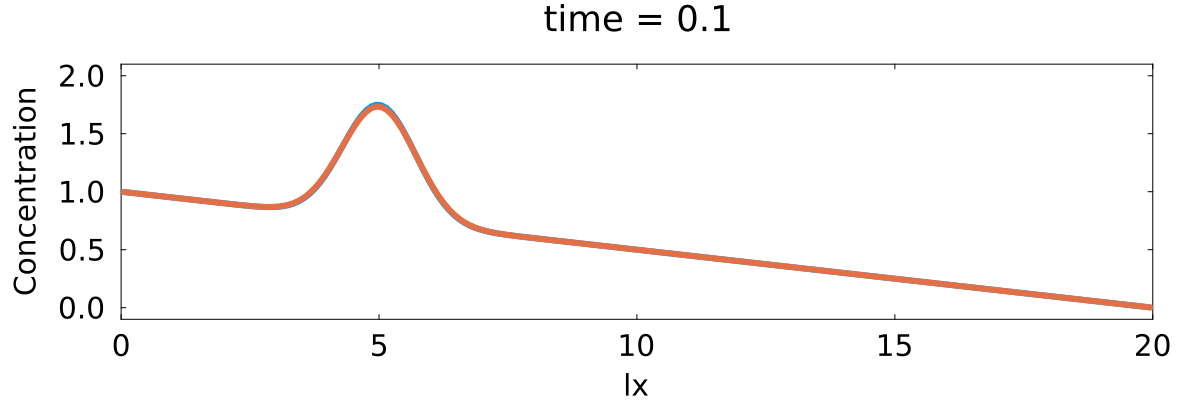

In [10]:
diffusion_1D()